### Dropout in Neural Networks

Dropout is an approach to regularization in neural networks which helps reducing interdependent learning amongst the neurons.

It works as an regularization. When random neurons are dropped out, the network is forced to learn several independent representations of the patterns with identical input and output. The generalization thus improves.

**Neural Network and Over Fitting**: Neural Network is a mapping from input to output. In more simple terms input is related to output by a some function(lets call it ‘f(x)’). Over fitting means when function ‘f(x)’ gives better results on train data but is not able to generalize on unseen(test) data.

**Over fitting cause:** When the Model/ Function/ Network is very complex as it contain many variables/ neurons and we have trained our network with large amount of training data such that the network has learned over the noise.

**How Dropout works in reducing over fitting:**
Applying dropouts makes some of the neurons ‘0’, hence the complexity of the network is decreased and our model gets best fit.

**Dropout function will randomly make some of the input neurons ‘0’ with probability 0.8 as passed by the argument 'keep_prob’, keeping the shape of the input tensor same as the shape of the output tensor.**

source:https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning-And-why-is-it-claimed-to-be-an-effective-trick-to-improve-your-network

<img src='drop.PNG' width='60%' height='60%'/>

### Load modules

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

### Defining Hyperparameters

In [2]:
N_SAMPLES = 20
N_HIDDEN1 = 400
N_HIDDEN2 = 400
learning_rate = 0.01

### Create random data

In [3]:
np.random.seed(1)

- Training data

In [20]:
X = np.linspace(-1, 1, N_SAMPLES)[:, np.newaxis]
Y = X+0.3*np.random.randn(N_SAMPLES)[:, np.newaxis]


- Testing 

In [21]:
test_x = X.copy()
test_y = test_x+0.3*np.random.randn(N_SAMPLES)[:, np.newaxis]

### Plot data

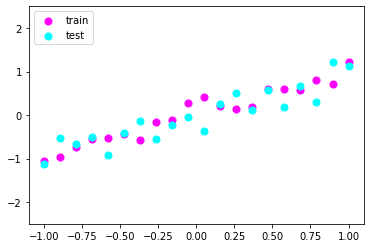

In [28]:
plt.scatter(X,Y, c="magenta", label="train", s=50)
plt.scatter(test_x,test_y, c="cyan", label="test", s=50)
plt.legend(loc="upper left")
plt.ylim((-2.5, 2.5))
plt.show()

### Build Neural Network

In [29]:
tf_x = tf.placeholder(tf.float32, [None, 1])
tf_y = tf.placeholder(tf.float32, [None, 1])
tf_is_training = tf.placeholder(tf.bool, None) #to control dropout on training & testing

### ANN - Witout Dropout (Overfitting Problem)

In [31]:
h1 = tf.layers.dense(tf_x, N_HIDDEN1, tf.nn.relu)
h2 = tf.layers.dense(h1, N_HIDDEN2, tf.nn.relu)
output = tf.layers.dense(h2, 1)

o_loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(o_loss)

### Run Graph

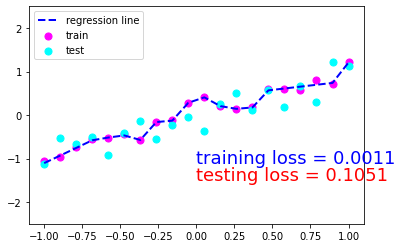

In [37]:
from IPython.display import clear_output

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(500):
    sess.run([optimizer], {tf_x:X, tf_y:Y})
    
    if epoch%10==0:
        o_loss_tr, o_out_tr = sess.run([o_loss, output], {tf_x:X, tf_y:Y})
        o_loss_tst, o_out_tst = sess.run([o_loss, output], {tf_x:test_x, tf_y:test_y})
        
        plt.scatter(X,Y, c="magenta", label="train", s=50)
        plt.scatter(test_x,test_y, c="cyan", label="test", s=50)
        plt.text(0, -1.5, "testing loss = %.4f"%o_loss_tst, fontdict = {
            'size':18,'color':'red'})
        plt.text(0, -1.1, "training loss = %.4f"%o_loss_tr, fontdict = {
            'size':18,'color':'blue'})
        
        plt.plot(test_x, o_out_tst, 'b--', lw=2, label='regression line')
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.01)
        clear_output(wait=True)
        
    plt.show()

### Adding Dropout layers

In [39]:
d1 = tf.layers.dense(tf_x, N_HIDDEN1, tf.nn.relu)
d1 = tf.layers.dropout(d1, rate=0.2, training=tf_is_training)

d2 = tf.layers.dense(d1, N_HIDDEN2, tf.nn.relu)
d2 = tf.layers.dropout(d2, rate=0.2, training=tf_is_training)

d_out = tf.layers.dense(d2, 1)
d_loss = tf.losses.mean_squared_error(tf_y, d_out)
d_train = tf.train.AdamOptimizer(learning_rate).minimize(d_loss)

### Run Graph: With dropout

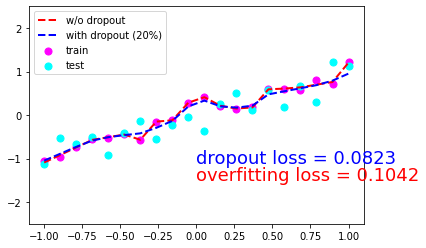

In [42]:
from IPython.display import clear_output

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(500):
    sess.run([optimizer, d_train], {tf_x:X, tf_y:Y, tf_is_training:True})
    
    if epoch%10==0:
        o_loss_, d_loss_, o_out_, d_out_ = sess.run([o_loss, d_loss, output, d_out], {tf_x:test_x, tf_y:test_y, tf_is_training:False})
        
        plt.scatter(X,Y, c="magenta", label="train", s=50)
        plt.scatter(test_x,test_y, c="cyan", label="test", s=50)
        
        plt.text(0, -1.5, "overfitting loss = %.4f"%o_loss_, fontdict = {
            'size':18,'color':'red'})
        plt.text(0, -1.1, "dropout loss = %.4f"%d_loss_, fontdict = {
            'size':18,'color':'blue'})
        
        plt.plot(test_x, o_out_, 'r--', lw=2, label='w/o dropout')
        plt.plot(test_x, d_out_, 'b--', lw=2, label='with dropout (20%)')
        
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.01)
        clear_output(wait=True)
        
    plt.show()

### Importance of is_training in dense layer

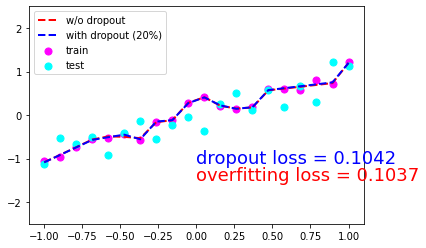

In [43]:
from IPython.display import clear_output

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(500):
    sess.run([optimizer, d_train], {tf_x:X, tf_y:Y, tf_is_training:False})
    
    if epoch%10==0:
        o_loss_, d_loss_, o_out_, d_out_ = sess.run([o_loss, d_loss, output, d_out], {tf_x:test_x, tf_y:test_y, tf_is_training:False})
        
        plt.scatter(X,Y, c="magenta", label="train", s=50)
        plt.scatter(test_x,test_y, c="cyan", label="test", s=50)
        
        plt.text(0, -1.5, "overfitting loss = %.4f"%o_loss_, fontdict = {
            'size':18,'color':'red'})
        plt.text(0, -1.1, "dropout loss = %.4f"%d_loss_, fontdict = {
            'size':18,'color':'blue'})
        
        plt.plot(test_x, o_out_, 'r--', lw=2, label='w/o dropout')
        plt.plot(test_x, d_out_, 'b--', lw=2, label='with dropout (20%)')
        
        plt.legend(loc='upper left')
        plt.ylim((-2.5, 2.5))
        plt.pause(0.01)
        clear_output(wait=True)
        
    plt.show()